In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
from keras.layers import Input
from keras.layers.core import Dense, Dropout
from keras.models import Model
from keras.losses import categorical_crossentropy, mse
from keras.optimizers import Adadelta, Adam, SGD

Using TensorFlow backend.


In [3]:
def plot_history(history):
    f1 = plt.figure()
    plt.plot(history.history['loss'],label='training')
    plt.plot(history.history['val_loss'],label='validation')
    #plt.ylim(0,1)
    plt.legend(loc='upper right')
    plt.show()
    
    f2 = plt.figure()
    plt.plot(history.history['acc'],label='training')
    plt.plot(history.history['val_acc'],label='validation')
    plt.ylim(0,1)
    plt.legend(loc='upper right')
    plt.show()
    return

In [4]:
X_train = np.load("/storage/yw18581/data/train_validation_test/Xy_train_dist.npz")["y"]
y_train = np.load("/storage/yw18581/data/train_validation_test/Xy_train_dist.npz")["dist"]

In [5]:
X_val = np.load("/storage/yw18581/data/train_validation_test/Xy_val_dist.npz")["y"]
y_val = np.load("/storage/yw18581/data/train_validation_test/Xy_val_dist.npz")["dist"]

In [6]:
def cut_X(arr):
    x_cut = arr[:,960:1300,600:]
    x_cut = x_cut[...,0]
    x_cut_out = x_cut.reshape(x_cut.shape[0],x_cut.shape[1]*x_cut.shape[2])
    return x_cut_out

In [7]:
def ohe(values):
    values_reshaped = values.reshape(-1, 1)
    onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
    onehot_encoded = onehot_encoder.fit_transform(values_reshaped)
    return onehot_encoded

In [8]:
X_train_cut = cut_X(X_train)

In [9]:
X_val_cut = cut_X(X_val)

In [10]:
y_train_ohe = ohe(y_train)
y_val_ohe = ohe(y_val)

In [11]:
def create_model(input_shape):
    input_layer = Input(shape=input_shape,name='input')
    x = Dense(64, activation='sigmoid')(input_layer)
    x = Dropout(0.8)(x)
    prediction = Dense(4, activation='softmax')(x)
    model = Model(inputs = input_layer, outputs = prediction)
    return model

model = create_model(input_shape=(X_train_cut.shape[1],))
model.compile(loss=categorical_crossentropy,
              optimizer=SGD(lr=0.01, momentum=0.9), metrics=['accuracy'])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 272000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                17408064  
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
Total params: 17,408,324
Trainable params: 17,408,324
Non-trainable params: 0
_________________________________________________________________


In [12]:
history_short = model.fit(X_train_cut, y_train_ohe, validation_data=(X_val_cut, y_val_ohe),
                    epochs=100, verbose=True, batch_size=8, shuffle=True)

Train on 768 samples, validate on 192 samples
Epoch 1/100
768/768 [==============================] - 3s 4ms/step - loss: 1.8468 - acc: 0.2943 - val_loss: 1.2565 - val_acc: 0.5417
Epoch 2/100
768/768 [==============================] - 1s 2ms/step - loss: 1.7638 - acc: 0.2852 - val_loss: 1.3545 - val_acc: 0.2500
Epoch 3/100
768/768 [==============================] - 1s 2ms/step - loss: 1.6777 - acc: 0.2643 - val_loss: 1.3237 - val_acc: 0.2500
Epoch 4/100
768/768 [==============================] - 1s 2ms/step - loss: 1.8188 - acc: 0.2617 - val_loss: 1.3981 - val_acc: 0.4688
Epoch 5/100
768/768 [==============================] - 1s 2ms/step - loss: 1.7945 - acc: 0.2826 - val_loss: 1.4023 - val_acc: 0.2083
Epoch 6/100
768/768 [==============================] - 1s 2ms/step - loss: 1.7540 - acc: 0.2734 - val_loss: 1.4219 - val_acc: 0.2500
Epoch 7/100
768/768 [==============================] - 1s 2ms/step - loss: 1.8021 - acc: 0.2747 - val_loss: 1.3346 - val_acc: 0.2500
Epoch 8/100
768/768 [==

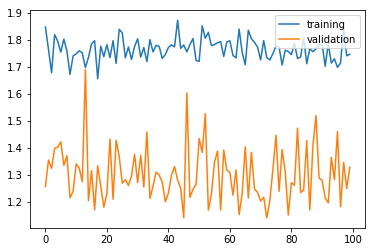

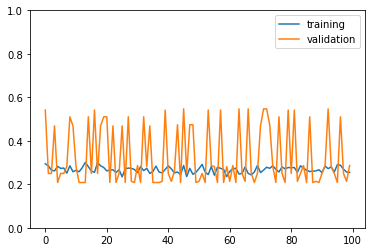

In [13]:
plot_history(history_short)